# AICE Associate 자격인증 샘플문항

### Fish Market 데이터 세트: 어시장 데이터를 이용한 물고기 무게 예측 문제

- 데이터 출처: https://www.kaggle.com/datasets/vipullrathod/fish-market

- 물고기의 어종과 다양한 측정 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 물고기의 무게를 예측하고 결과를 분석하세요.

---

### [유의사항]

- 각 문항의 답안코드는 반드시 `# 여기에 답안코드를 작성하세요` 로 표시된 cell에 작성해야 합니다.
- 제공된 시험문항 cell을 삭제하거나 답안 위치가 아닌 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
- 시험 중에는 상단의 '임시저장' 버튼을 클릭하여 저장을 해주시고, 답안 제출시에는 '최종제출' 버튼을 클릭해주시기 바랍니다.
- 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
- 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
- 자격인증 문제에 제공된 데이터는 제 3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.
- **오픈북 허용사이트에서만 참고 가능하며 그외 사이트 참고시 부정행위로 간주될수 있습니다.**

---

### [ 데이터 컬럼 설명 (데이터 파일명: fish.csv) ]

- **Species** : 어종 (Bream, Roach, Whitefish, Parkki, Perch, Pike, Smelt)
- **Weight** : 물고기의 무게 (Gram 단위)
* **Length1** : 길이1, 주둥이 끝에서 꼬리가 시작되는 부분까지의 길이 (cm 단위)
* **Length2** : 길이2, 주둥이 끝에서 꼬리지느러미가 갈라지는 홈까지의 길이 (cm 단위)
* **Length3** : 길이3, 주둥이 끝에서 꼬리지느러미의 가장 끝부분까지의 길이 (cm 단위)
- **Height** : 높이 (cm 단위)
- **Width** : 너비 (cm 단위)


In [16]:
# 다음 코드를 실행하여 데이터 파일과 부속 파일을 다운로드 하세요.
import urllib.request

BASE = "https://raw.githubusercontent.com/metamath1/aicebook/main/ch05"

urllib.request.urlretrieve(f"{BASE}/reg/fish/fish.csv", "fish.csv")
urllib.request.urlretrieve(f"{BASE}/aice_ans.py", "aice_ans.py")
urllib.request.urlretrieve(f"{BASE}/reg/fish/answer_config.json", "answer_config.json")

('answer_config.json', <http.client.HTTPMessage at 0x7d89af065310>)

## 기초정보 확인 및 시각화

1. Pandas 함수로 csv파일을 읽어 df에 할당하는 코드를 작성하세요.
    - df에 포함된 샘플의 개수를 '답안01'변수에 대입하세요.(예: 답안01 = 1000)

In [17]:
# 여기에 답안코드를 작성하세요
import pandas as pd

df = pd.read_csv("fish.csv")
print(df.shape)

답안01 = len(df) # 159

(159, 7)


#### 문제 1 해설

이 문제는 Pandas의 가장 기본적인 작업인 CSV 파일 읽기와 데이터프레임의 크기 확인을 다룹니다. `read_csv()` 함수로 파일을 불러오고, `shape` 속성으로 행과 열의 개수를 파악하는 것이 핵심입니다.

먼저 pandas 라이브러리를 import하고, `read_csv()` 함수로 fish.csv 파일을 읽어옵니다. 이 함수는 CSV 파일의 경로를 문자열로 받아 데이터프레임 객체를 반환합니다.

파일이 정상적으로 로딩되었는지 확인하기 위해 `shape` 속성을 출력합니다. shape는 (행 개수, 열 개수) 형태의 튜플을 반환하므로, 첫 번째 값이 전체 샘플의 개수입니다. 출력 결과에서 첫 번째 값 159가 포함된 샘플의 개수입니다. `shape` 속성은 메서드가 아니라 속성이므로 괄호 없이 사용한다는 점을 기억하세요.

2. 종(Species)의 분포를 확인하고, 가장 많이 등장하는 종 이름을 답안02에 문자열로 저장하세요.
    - seaborn의 countplot을 사용하세요. (예: 답안02 = 'Bream')

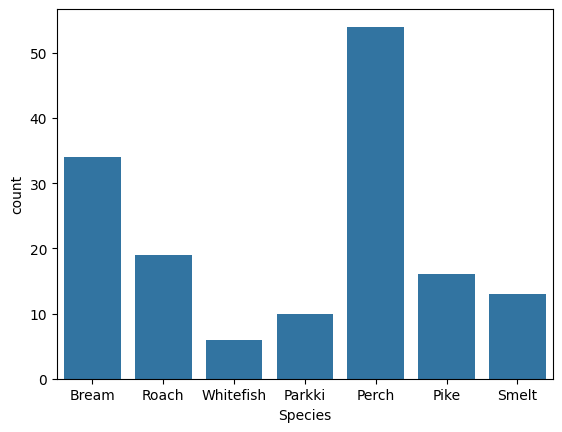

In [18]:
# 여기에 답안코드를 작성하세요
import seaborn as sns

sns.countplot(data=df, x='Species')

답안02 = df['Species'].value_counts().idxmax() # Perch

#### 문제 2 해설

이 문제는 seaborn을 사용한 범주형 데이터 시각화를 다룹니다.

생성된 그래프를 보면 7종의 물고기가 있으며, 각 막대의 높이가 해당 종의 샘플 개수를 나타냅니다. Perch가 가장 많고, Bream, Roach 순입니다. 가장 많은 종의 이름을 찾기 위해 `value_counts()` 메서드를 사용하고, `idxmax()`로 최댓값을 가진 인덱스(종 이름)를 추출합니다. 결과는 'Perch'입니다. 물론 'Perch'를 바로 대입해도 됩니다.

3. 길이(Length3)와 무게(Weight)의 상관관계를 파악하고자 합니다. 가이드에 따라 컬럼의 상관관계를 구하는 코드의 빈칸을 채우고 답안을 작성하세요.
    - 대상 데이터프레임: df
    - 특정 컬럼에 대한 상관관계를 구하는 코드는 주어집니다.
    - 코드의 빈칸 `<blank>`를 채우고 반드시 코드를 실행하세요.
    - 코드의 빈칸 `<blank>`값을 '답안03_1'에 대입하세요.
    - 양의 상관 경향이 뚜렷하면 `답안03_2`에 1을 대입하고 그렇지 않으면 0을 대입하세요.

In [19]:
# 여기에 답안코드를 작성하세요.  <blank>를 채우고 코드를 실행하세요.

column_list = ['Length3', 'Weight']
# df[column_list].<blank>
print(df[column_list].corr())

답안03_1 = 'corr'
답안03_2 = 1

          Length3    Weight
Length3  1.000000  0.923044
Weight   0.923044  1.000000


#### 문제 3 해설

이 문제는 여러 변수 간의 상관관계를 한 번에 계산하는 방법을 다룹니다. `corr()` 메서드는 데이터프레임의 수치형 컬럼들 간의 상관계수를 계산하여 상관행렬을 반환합니다.

먼저 분석하려는 컬럼들의 이름을 리스트로 만듭니다. 여기서는 'Length3'과 'Weight' 두 개의 컬럼을 선택합니다. 데이터프레임에서 이 컬럼들만 선택하려면 `df[column_list]`처럼 리스트 인덱싱을 사용합니다.

선택된 데이터프레임에 `corr()` 메서드를 적용하면 각 컬럼 쌍의 상관계수를 포함한 행렬이 생성됩니다. 결과를 보면 Length3와 Weight의 상관계수는 약 0.923044입니다. 같은 변수끼리의 상관계수는 당연히 1.000000입니다.

코드의 빈칸에는 `corr`이 들어가며, 양의 상관 경향이 뚜렷하므로 답안03_2는 1입니다. 상관계수가 0.9 이상이면 매우 강한 양의 상관관계를 의미합니다.

4. 종별(Species) 무게(Weight)의 분포를 boxplot으로 시각화하고, 중앙값(median) 이 가장 큰 종 이름을 답안04에 저장하세요.

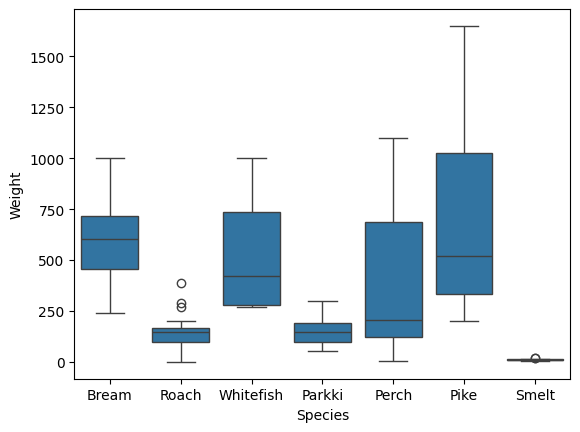

In [20]:
# 여기에 답안코드를 작성하세요
sns.boxplot(data=df, x='Species', y='Weight')

답안04 = (df.groupby('Species')['Weight'].median().sort_values(ascending=False).index[0]) # Bream

#### 문제 4 해설

이 문제는 범주형 변수와 연속형 변수 간의 관계를 boxplot으로 시각화하고, 특정 통계량을 계산하는 방법을 다룹니다. `boxplot()`은 각 범주별로 연속형 변수의 분포를 상자그림으로 표현하여 중앙값, 사분위수, 이상치 등을 한눈에 파악할 수 있게 합니다.

`x` 매개변수에 'Species'를 지정하여 x축에 물고기 종을 배치하고, `y` 매개변수에 'Weight'를 지정하여 각 종별로 무게의 분포를 표시합니다.

그래프를 보면 Pike가 가장 높은 중앙값을 보이고, Roach와 Smelt가 낮은 중앙값을 보입니다. 중앙값이 가장 큰 종을 찾기 위해 `groupby('Species')`로 종별로 그룹화하고, 'Weight' 열의 중앙값을 `median()`으로 계산합니다. `sort_values(ascending=False)`로 내림차순 정렬하면 가장 큰 값이 첫 번째에 오고, `.index[0]`으로 해당 종의 이름을 추출합니다. 결과는 'Bream'입니다.

5. 특정 크기 이상의 물고기 수를 알고 싶습니다. 길이3(Length3)이 40cm이상이고 높이(Height)가 15cm이상인 경우만 선택하세요.

    - 해당 조건을 만족하는 샘플 개수를 구하여 `답안05`에 저장하세요.

In [21]:
# 여기에 답안코드를 작성하세요
cond = (df['Length3'] >= 40) & (df['Height'] >= 15)
filtered_df = df[cond]

답안05 = len(filtered_df) # 12

#### 문제 5 해설

이 문제는 여러 조건을 동시에 만족하는 데이터를 필터링하는 방법을 다룹니다. pandas에서 `&` 연산자를 사용해서 복수의 조건을 결합할 때 각 조건은 괄호로 묶어야 함을 다시 한번 확인하세요.



6. 예측하고자 하는 타겟 변수를 y에 대입하고 나머지 변수를 X에 대입하세요.
    - 분리 후 X의 데이터 타입을 확인하고 수치형 변수의 개수를 '답안06'에 대입하세요.

In [22]:
# 여기에 답안코드를 작성하세요

y = df['Weight']
X = df.drop(columns=['Weight'])

num_vars = X.select_dtypes(include='number').columns

답안06 = len(num_vars) # 5

#### 문제 6 해설

이 문제는 머신러닝 모델 학습을 위해 특성과 타겟을 분리하는 기본 작업을 다룹니다. 타겟 변수 y는 예측하고자 하는 값이고, 특성 변수 X는 예측에 사용되는 입력 데이터입니다.

먼저 타겟 변수를 분리합니다. `df['Weight']`로 해당 열을 시리즈 형태로 추출하여 y에 할당합니다. 이 열은 물고기의 무게를 나타내는 값으로, 회귀 문제의 타겟이 됩니다.

다음으로 특성 변수를 준비합니다. `drop()` 메서드에서 `columns=['Weight']`로 타겟 열을 제거합니다. 남은 모든 열이 특성 변수로 사용될 X가 됩니다.

`select_dtypes(include='number')`를 사용하여 X에서 수치형 열만 선택하고, `.columns` 속성으로 컬럼 이름 목록을 얻습니다. `len()` 함수로 개수를 세면 수치형 변수의 개수를 알 수 있습니다. 결과는 5개입니다.

## 데이터 전처리


7. 아래 가이드를 따라 결측치를 처리하세요.
    - 대상 데이터 프레임 X에 결측치가 있는지 확인하세요.
    - 결측치가 있다면 X에서 범주형(object)은 최빈값(mode), 수치형은 중앙값(median)으로 대체하여 `X_imp`에 저장하세요.
    - 대체 후 남아있는 결측치 총 개수를 계산하여 `답안07`에 저장하세요.

In [23]:
# 여기에 답안코드를 작성하세요
X_imp = X.copy()

print( X_imp.isnull().sum() )

CAT_VARS = X.select_dtypes(include='object').columns
NUM_VARS = X.select_dtypes(include='number').columns

X_imp[CAT_VARS] = X[CAT_VARS].fillna(X[CAT_VARS].mode().iloc[0])
X_imp[NUM_VARS] = X[NUM_VARS].fillna(X[NUM_VARS].median())

# 대안 코드
# # 범주형: 최빈값
# for c in X_imp.select_dtypes(include='object').columns:
#     mode_val = X_imp[c].mode(dropna=True)
#     fill_val = mode_val.iloc[0] if len(mode_val) else None
#     X_imp[c] = X_imp[c].fillna(fill_val)

# # 수치형: 중앙값
# for c in X_imp.select_dtypes(include='number').columns:
#     med = X_imp[c].median()
#     X_imp[c] = X_imp[c].fillna(med)

답안07 = int(X_imp.isnull().sum().sum()) # 0

Species    7
Length1    0
Length2    0
Length3    0
Height     8
Width      6
dtype: int64


#### 문제 7 해설

이 문제는 결측치를 확인하고 처리하는 방법을 다룹니다. 결측치는 데이터 분석과 모델 학습에 문제를 일으킬 수 있으므로, 사전에 확인하고 적절히 처리해야 합니다. 이전 문제에서는 결측치가 없어 실제로 할 작업이 없었지만 여기서는 본격적으로 결측치 처리를 하고 있습니다.

먼저 `X.copy()`로 원본 데이터의 복사본을 만들어 작업합니다. 이렇게 하면 원본 데이터를 보존할 수 있습니다. `isnull().sum()`으로 각 열의 결측치 개수를 확인하면 Species에 7개, Height에 8개, Width에 6개의 결측치가 있음을 알 수 있습니다.

문제에서 수치형, 범주형 변수를 구분하여 결측치 처리를 요구하고 있습니다. 따라서 먼저 범주형 변수와 수치형 변수를 구분합니다. `select_dtypes(include='object')`로 범주형 컬럼을, `include='number'`로 수치형 컬럼을 선택합니다.

범주형 변수의 결측치는 최빈값(mode)으로 채웁니다. `fillna()` 메서드에 `X[CAT_VARS].mode().iloc[0]`를 전달하면 각 컬럼의 최빈값으로 결측치가 대체됩니다. 최빈값을 여러개가 될 수 있기 때문에 마지막에 `mode()`로 구한 최반값에서 인덱싱을 한번 한것을 주의하세요.

수치형 변수의 결측치는 중앙값(median)으로 채웁니다. `fillna()` 메서드에 `X[NUM_VARS].median()`을 전달하면 각 컬럼의 중앙값으로 결측치가 대체됩니다.

코드에는 두 가지 방법이 제시되어 있습니다. 주석 처리된 대안 코드는 반복문을 사용하여 각 컬럼을 개별적으로 처리하는 방식입니다. 범주형 변수의 경우 각 컬럼의 최빈값을 계산하고 존재 여부를 확인한 후 결측치를 채우고, 수치형 변수는 중앙값을 계산하여 결측치를 채웁니다. 반면 제시된 코드는 벡터화 연산을 사용하여 한 줄로 모든 컬럼을 동시에 처리합니다. 벡터화 방식이 더 간결하고 실행 속도도 빠르지만, 반복문 방식은 직관적이기 때문에 자신의 상황에 맞게 시험에 사용할 방법을 결정하시기 바랍니다.

처리 후 `isnull().sum().sum()`으로 전체 결측치 개수를 확인하면 0이 나옵니다. 이는 모든 결측치가 성공적으로 처리되었음을 의미합니다.



8. 아래 가이드를 따라 불필요한 변수를 삭제하세요.
    - 대상 데이터프레임: X_imp
    - Length1, Length2 를 삭제하하세요.
    - 전처리 반영된 결과를 새로운 데이터프레임 변수명 X_del에 저장하세요.
    - `X_del`의 컬럼 수를 `답안08`에 저장하세요.

In [24]:
# 여기에 답안코드를 작성하세요
X_del = X_imp.drop(columns=['Length1', 'Length2'])

답안08 = X_del.shape[1] # 4

#### 문제 8 해설

`drop()` 메서드에 삭제할 열 이름을 리스트로 전달하고 `columns` 매개변수를 사용합니다. 여기서는 'Length1'과 'Length2' 두 개의 열을 동시에 제거합니다. 이 두 열은 다른 길이 측정값과 중복되는 정보를 담고 있어 제거 대상이 됩니다.

`shape[1]`로 컬럼 개수를 확인하면 4가 나옵니다. 원래 6개의 컬럼에서 2개를 제거하여 4개가 남았습니다. `shape` 속성은 (행 개수, 열 개수) 튜플을 반환하므로, `shape[1]`로 열 개수만 추출할 수 있습니다.

9. 범주형 변수를 원핫 인코딩 합니다. 원핫인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.
    - 대상 데이터 프레임: X_del
    - 원핫인코딩 대상: 범주형: `object` 타입 전체
    - `pd.get_dummies(..., dtype=int)` 로 인코딩 후 `X_preset` 에 저장하세요.
    - `X_preset`의 컬럼 수를 `답안09`에 저장하세요.

In [25]:
# 여기에 답안코드를 작성하세요
CAT_VARS = X_del.select_dtypes(include='object').columns

X_preset = pd.get_dummies(X_del, columns=CAT_VARS, dtype=int)

답안09 = X_preset.shape[1] # 10

#### 문제 9 해설

범주형 변수 전체를 인코딩 해야 하므로 먼저 `select_dtypes(include='object')`로 범주형 컬럼을 선택합니다. 이 데이터셋에서는 'Species' 컬럼이 유일한 범주형 변수입니다.

`pd.get_dummies()` 함수는 원핫인코딩을 수행합니다. `columns` 매개변수에 CAT_VARS를 전달하여 범주형 컬럼만 변환하고, `dtype=int`로 결과를 정수형으로 지정합니다. 이 함수는 각 범주를 별도의 컬럼으로 만들어 해당 범주이면 1, 아니면 0을 할당합니다.

원본 'Species' 컬럼이 7종의 물고기를 가지고 있었다면, 원핫인코딩 후에는 'Species_Bream', 'Species_Roach' 같은 7개의 이진 컬럼으로 확장됩니다. `shape[1]`로 확인하면 총 10개의 컬럼이 생성되었습니다.

10. 훈련과 검증 각각에 사용할 데이터 셋을 분리 하려고 합니다. 가이드에 따라 훈련, 검증 데이터를 분리하고 스케일링을 수행하세요.
    - 데이터 셋 분리
        - 대상 데이터 프레임: X_preset
        - 훈련 데이터셋 label: y_train, 훈련 데이터셋 feature: X_train
        - 검증 데이터셋 label: y_valid, 검증 데이터셋 feature: X_valid
        - 훈련:검증 = 80:20
        - random_state=42
        - stratify 옵션 사용
        - train_test_split 사용

    - 스케일링
        - 수치형 데이터에 StandardScaler 사용
        - 스케일된 데이터는 X_train, X_valid에 저장
        - 스케일된 후 X_train의 Height 변수의 중앙값을 '답안10'에 대입하세요. 반올림하여 소수 셋째자리까지 계산하세요.(예: 답안10=0.045)

In [26]:
# 여기에 답안코드를 작성하세요
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_valid, y_train, y_valid = train_test_split(
    X_preset, y, test_size=0.2, random_state=42
)

NUM_VARS = X_train.select_dtypes(include='number').columns

scaler = StandardScaler()
scaler.fit(X_train[NUM_VARS])
X_train[NUM_VARS] = scaler.transform(X_train[NUM_VARS])
X_valid[NUM_VARS] = scaler.transform(X_valid[NUM_VARS])

답안10 = round(float(X_train['Height'].median()), 3) # -0.275

#### 문제 10 해설

이 문제는 훈련 데이터와 검증 데이터를 분리하고 스케일링을 수행하는 전체 전처리 과정을 다룹니다. 데이터의 분리는 계속 사용하던 방식과 다를것이 없습니다.

다음으로 `StandardScaler`를 사용하여 수치형 변수를 스케일링합니다. StandardScaler는 평균을 0, 표준편차를 1로 만드는 표준화를 수행합니다. `select_dtypes(include='number')`로 수치형 컬럼만 선택하여 NUM_VARS에 저장합니다.

`fit()` 메서드는 훈련 데이터의 평균과 표준편차를 학습하고, `transform()` 메서드는 그 통계량을 사용하여 데이터를 변환합니다. 스케일링은 훈련 데이터에만 fit하고, 검증 데이터는 훈련 데이터의 통계량으로 transform해야 합니다. 이렇게 해야 데이터 유출을 방지하고 올바른 평가가 가능합니다. 두 데이터 셋에 모두 `fit_transform()`하지 않도록 주의해야 합니다.

스케일링 후 X_train의 'Height' 컬럼의 중앙값을 계산하면 약 -0.275가 나옵니다. 표준화된 데이터이므로 음수 값이 나올 수 있으며, 소수점 셋째자리까지 반올림한 값이 답입니다.

## 모델링 및 평가


11. 전처리된 데이터로 머신러닝 모델링을 수행합니다. 아래 가이드를 따라 선형회귀(linear regression), 랜덤 포레스트(random forest) 모델을 만들고 학습을 진행하세요.

- 선형회귀(LinearRegression)
    - 선형회귀 모델을 lr 변수에 저장해주세요.

- 랜덤포레스트(RandomForest)
    - 트리의 최대 깊이 : 5로 설정
    - 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split) : 3로 설정
    - random_state : 120으로 설정
    - 랜덤포레스트 모델을 rf 변수에 저장해 주세요.

- 위의 2개의 모델에 대해 fit을 활용해 모델을 학습해 주세요. 학습 시 훈련데이터 셋을 활용해 주세요.

In [27]:
# 여기에 답안코드를 작성하세요
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(max_depth=5, min_samples_split=3, random_state=120)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, min_samples_split=3, random_state=120)

#### 문제 11 해설

이 문제는 회귀 문제를 위한 선형회귀와 랜덤포레스트 모델을 생성하고 학습하는 방법을 다룹니다. 선형회귀는 가장 기본적인 회귀 알고리즘이고, 랜덤포레스트는 여러 개의 결정 트리를 앙상블하여 더 안정적인 예측을 제공합니다.

먼저 필요한 클래스를 import합니다. `LinearRegression`은 선형회귀를, `RandomForestRegressor`는 회귀용 랜덤포레스트를 구현합니다.

선형회귀 모델은 별도의 하이퍼파라미터 없이 기본 설정으로 생성합니다. `LinearRegression()` 객체를 만들고 `fit()` 메서드로 훈련 데이터를 학습시킵니다. 선형회귀는 특성과 타겟 간의 선형 관계를 가정하는 단순하지만 해석하기 쉬운 모델입니다.

랜덤포레스트 모델을 생성할 때 `max_depth=5`로 각 트리의 최대 깊이를 제한하고, `min_samples_split=3`으로 노드를 분할하기 위한 최소 샘플 수를 지정합니다. `random_state=120`으로 재현성을 보장합니다. 생성된 모델 객체에 `fit()` 메서드로 훈련 데이터를 학습시킵니다.

두 모델 모두 같은 훈련 데이터로 학습하므로, 이후 검증 데이터로 성능을 비교할 수 있습니다.

12.  위 선형회귀와 랜덤포레스트 모델의 성능을 평가하려고 합니다. 아래 가이드에 따라 예측 결과의 RMSE(Root Mean Squared Error)를 구하고 평가하세요.

- 성능 평가는 검증 데이터셋을 활용하세요.

- 11번 문제에서 만든 선형회귀 모델로 y값을 예측(predict)하여 y_pred_lr에 저장하세요.

- 검증 정답(y_valid)과 예측값(y_pred_lr)의 RMSE를 구하고 lr_rmse 변수에 저장하세요.

- 11번 문제에서 만든 랜덤포레스트 모델로 y값을 예측(predict)하여 y_pred_rf에 저장하세요.

- 검증 정답(y_valid)과 예측값(y_pred_rf)의 RMSE를 구하고 rf_roauc 변수에 저장하세요.

- 2개의 모델에 대한 RMSE 성능평가 결과을 확인하여 성능 좋은 모델 이름을 '답안12' 변수에 저장하세요.
예) 답안12 = 'linear' 혹은 답안12 = 'randomforest

In [28]:
# 여기에 답안코드를 작성하세요
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_lr = lr.predict(X_valid)
y_pred_rf = rf.predict(X_valid)

lr_rmse = float(np.sqrt(mean_squared_error(y_valid, y_pred_lr)))
rf_rmse = float(np.sqrt(mean_squared_error(y_valid, y_pred_rf)))
print(lr_rmse, rf_rmse)

답안12 = 'randomforest'

135.0197887664755 75.7260025578107


#### 문제 12 해설

이 문제는 회귀 모델의 성능을 RMSE 지표로 평가하는 방법을 다룹니다. RMSE는 예측값과 실제값의 차이를 제곱한 후 평균을 내고 제곱근을 취한 값으로, 값이 작을수록 모델의 예측 성능이 우수함을 의미합니다.

먼저 각 모델로 검증 데이터에 대한 예측을 수행합니다. `predict()` 메서드에 `X_valid`를 전달하면 각 샘플에 대한 예측값을 반환합니다. 선형회귀 모델의 예측 결과는 `y_pred_lr`에, 랜덤포레스트 모델의 예측 결과는 `y_pred_rf`에 저장합니다.

RMSE를 계산하기 위해 `mean_squared_error()` 함수를 사용합니다. 이 함수는 실제값 `y_valid`와 예측값을 받아 평균제곱오차(MSE)를 계산합니다. scikit-learn 1.4 버전 미만에는 RMSE를 직접 계산하는 함수가 없으므로, MSE의 제곱근을 `np.sqrt()`로 직접 계산하여 RMSE를 구합니다. `float()`로 감싸서 소수점 형태로 변환합니다. AICE 프로젝트 페이지의 scikit-learn 버전은 2025년 현재 1.3.2입니다.

하지만 scikit-learn 1.4 버전 이상에서는 `root_mean_squared_error()` 함수가 추가되어 RMSE를 직접 계산할 수 있습니다. 만약 최신 버전을 사용한다면 `from sklearn.metrics import root_mean_squared_error`로 import하여 바로 사용할 수 있습니다.

출력 결과를 보면 선형회귀는 약 135.02, 랜덤포레스트는 약 75.73입니다. 랜덤포레스트의 RMSE가 더 낮으므로, 성능이 더 우수한 모델은 'randomforest'입니다. RMSE는 타겟 변수와 같은 단위를 가지므로 해석하기 쉽고, 큰 오차에 더 민감하게 반응하는 특징이 있습니다.

13. 딥러닝 모델링
    - 딥러닝 모델링은 다음 조건을 사용하시오.
        - 히든 레이어 2개 이상 사용, 활성함수 gelu
        - Dropout 레이어 2개 이상 사용, 드롭아웃 비율 0.3
        - 손실함수: mse를 문자열 형태로 사용하시오.
        - 매트릭: mae
        - 옵티마이저: adam, lr=0.01
        - 에폭: 30
        - 배치사이즈: 32
        - 각 에폭마다 `X_valid`, `y_valid`를 써서 검증을 수행하시오.
        - 학습 정보를 `history` 변수에 저장하시오.
        - early stop 콜백:
            - `val_mae` 기준
            - `patience=3`로 적용
        - checkpoint 콜백:
            - 파일경로: `checkpoint.keras`,
            - `val_mae` 모니터링
            - `save_best_only=True`
        - 학습이 종료된후 모델 변수를 답안13_1에 대입하시오.
        - 학습이 종료된후 `history.history` 변수를 답안13_2에 대입하시오.

In [30]:
# 여기에 답안코드를 작성하세요
import tensorflow as tf
from tensorflow import keras

mlp = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='gelu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='gelu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='gelu'),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)

es = keras.callbacks.EarlyStopping(monitor='val_mae', patience=3)
mc = keras.callbacks.ModelCheckpoint('checkpoint.keras',
                                     monitor='val_mae', save_best_only=True)

mlp.compile(optimizer=optimizer, loss="mse", metrics=['mae'])

history = mlp.fit(
    X_train, y_train,
    epochs=30, batch_size=32,
    validation_data=(X_valid, y_valid),
    callbacks=[es, mc],
    verbose=1
)

답안13_1 = mlp
답안13_2 = history.history


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 272631.4375 - mae: 401.4652 - val_loss: 335076.4062 - val_mae: 441.4706
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 253567.9062 - mae: 376.0594 - val_loss: 317740.7500 - val_mae: 429.9422
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 210349.5156 - mae: 343.4728 - val_loss: 271039.0312 - val_mae: 397.5665
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 220827.8438 - mae: 343.5479 - val_loss: 175480.7656 - val_mae: 318.8034
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 117864.0391 - mae: 250.1230 - val_loss: 49449.4258 - val_mae: 150.3966
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 28376.4375 - mae: 117.8489 - val_loss: 42349.9219 - val_mae: 142.8588
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 56453.1484 - mae: 176.2449 - val_loss: 21132.1562 - val_mae: 112.4753
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 25425.6484 - mae: 114.9206 - val_loss: 21189

#### 문제 13 해설

이 문제는 회귀 문제를 위한 딥러닝 모델을 정의하고 학습하는 전체 과정을 다룹니다. 텐서플로를 사용하여 다층 퍼셉트론 모델을 구성하고, 옵티마이저와 콜백을 설정한 후 학습을 진행합니다.

먼저 `Sequential` 모델로 레이어를 순차적으로 쌓습니다. `Input` 레이어로 입력 크기를 `X_train.shape[1]`로 지정하여 특성 개수에 맞춥니다. 너머지 레이어는 2진 분류 문제와 동일하게 쌓아 올립니다. 활성화 함수는 gelu를 사용했습니다.

`compile()` 메서드로 모델을 구성합니다. 손실 함수는 회귀 문제에 적합한 'mse'(평균제곱오차)를, 평가 지표는 'mae'(평균절대오차)를 사용합니다.

학습 결과 EarlyStopping이 작동하여 학습이 적절히 종료되는 것을 볼 수 있습니다.



14. 성능 평가
    - 학습 후 저장된 체크포인트를 모델에 로딩하고 검증 데이터 셋에 대해 성능을 평가하시오.
        - 평가 후 검증 세트에 대한 mae 를 소수 4째 자리 까지 반올림하여 `답안14_1`에 대입하시오.

    - history에 저장된 수치들을 시각화 하시오.
        - loss, accuracy의 그래프를 1행 2열인 `fig`, `ax` 변수에 만들어 각각 표시하시오.
        - 왼쪽 그래프에 `loss`, `val_loss`를 오른쪽 그래프에 `mae`, `val_mae`를 표시하시오.
        - 학습과 검증의 범례를 표시하시오.
        - 그래프의 제목은 'Loss by epoch', 'MAE by epoch'으로 하시오.
        - 그래프의 X축 이름은 `epochs`, Y축 이름은 각각 'loss', 'mae'로 표시하시오.
        - 시각화를 완료한 후 `fig`변수를 `답안14_2`에 대입하시오.

In [31]:
# 여기에 답안코드를 작성하세요: 모델 체크포인트를 로딩하고 평가를 수행하시오.
mlp.load_weights('checkpoint.keras')

eval_res = mlp.evaluate(X_valid, y_valid, verbose=0)
답안14_1 = round(float(eval_res[1]), 4)


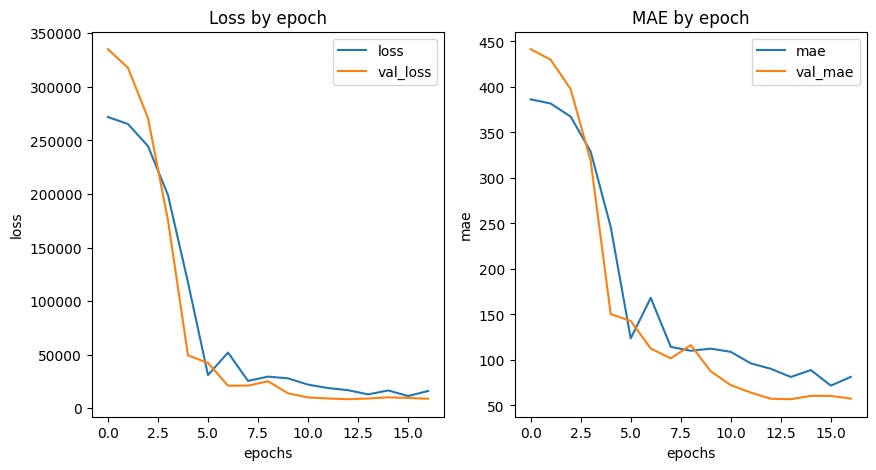

In [32]:
# 여기에 답안코드를 작성하세요: 학습 과정을 시각화 하시오.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

epochs = np.arange(1, len(history.history['loss'])+1)

ax[0].plot(history.history['loss'], label='loss')
ax[0].plot(history.history['val_loss'], label='val_loss')
ax[0].set_title('Loss by epoch')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(history.history['mae'], label='mae')
ax[1].plot(history.history['val_mae'], label='val_mae')
ax[1].set_title('MAE by epoch')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('mae')
ax[1].legend()

plt.show()

답안14_2 = fig


#### 문제 14 해설

이 문제는 학습 과정을 시각화하여 모델의 성능 변화를 분석하는 방법을 다룹니다. 학습 곡선을 그려보면 과적합이나 학습 부족 여부를 판단할 수 있습니다. 문제 풀이에 특이할 만한 사항이 없습니다. 2진 분류 문제와 동일하게 풀면 되니 2진 분류 문제의 14번 문항 해설을 참고하세요.

- 아래 셀을 실행하여 채점하세요.

In [33]:
import importlib

try:
    import aice_ans
    importlib.reload(aice_ans)
    aice_ans.grade_answers(globals())
except ImportError:
    print("🚨 채점 파일을 찾을 수 없습니다.")
    print("왼쪽 사이드바의 '파일 업로드' 버튼을 눌러 채점 파일을 업로드했는지 확인해주세요.")
except Exception as e:
    print(f"🚨 채점 중 예상치 못한 오류가 발생했습니다: {e}")

📁 설정 파일 로드 완료: AICE Associate - Fish Market 회귀 문제
✅ 답안01: 정답입니다!
--------------------
✅ 답안02: 정답입니다!
--------------------
✅ 답안03_1: 정답입니다!
--------------------
✅ 답안03_2: 정답입니다!
--------------------
✅ 답안04: 정답입니다!
--------------------
✅ 답안05: 정답입니다!
--------------------
✅ 답안06: 정답입니다!
--------------------
✅ 답안07: 정답입니다!
--------------------
✅ 답안08: 정답입니다!
--------------------
✅ 답안09: 정답입니다!
--------------------
✅ 답안10: 정답입니다!
--------------------
✅ 답안12: 정답입니다!
--------------------
✅ 답안13_1: 정답입니다! (Dense: 3개 + 출력층, Dropout: 2개)
--------------------
✅ 답안13_2: 정답입니다! (EarlyStopping 정상 작동, best epoch: 14)
--------------------
✅ 답안14_1: 정답입니다! (값: 56.7884)
--------------------
✅ 답안14_2: 정답입니다!
--------------------

📊 채점 결과: 16/16 정답
📈 점수: 100.0%
